In [161]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RepeatedKFold, StratifiedKFold, KFold, cross_val_score, cross_val_predict, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import joblib
import seaborn as sns

## Data analysis

In [162]:
dataset = pd.read_csv("datasets/dataset_min6.csv", index_col=0, dtype={"rad_won": bool})

In [163]:
dataset.head()

,0_deaths,0_gold,0_gold_per_min,0_gold_spent,0_hero_healing,0_kills,0_tower_damage,0_xp_per_min,1_deaths,1_gold,...,131_xp_per_min,132_deaths,132_gold,132_gold_per_min,132_gold_spent,132_hero_healing,132_kills,132_tower_damage,132_xp_per_min,rad_won
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2923.5,...,473.250000,8.629630,1613.962963,372.555556,11012.962963,173.185185,6.074074,613.666667,398.296296,True
1,6.0,1007.0,398.0,16085.0,0.0,1.0,447.0,491.0,NaN,NaN,...,506.200000,6.250000,2554.250000,331.250000,10797.500000,0.000000,4.000000,417.500000,400.000000,True
2,11.0,686.0,213.0,4420.0,0.0,1.0,0.0,167.0,NaN,NaN,...,282.333333,7.666667,1599.666667,516.000000,14258.333333,453.666667,7.666667,1046.000000,516.000000,False
3,5.0,2907.5,408.5,11462.5,0.0,6.5,2163.5,418.0,NaN,NaN,...,402.666667,9.500000,2095.500000,437.500000,17287.500000,0.000000,11.500000,961.000000,577.000000,True
4,8.5,772.0,178.0,5750.0,0.0,1.5,43.5,207.5,NaN,NaN,...,627.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [164]:
print(dataset.columns)

Index(['0_deaths', '0_gold', '0_gold_per_min', '0_gold_spent',
       '0_hero_healing', '0_kills', '0_tower_damage', '0_xp_per_min',
       '1_deaths', '1_gold', '1_gold_per_min', '1_gold_spent',
       '1_hero_healing', '1_kills', '1_tower_damage', '1_xp_per_min',
       '2_deaths', '2_gold', '2_gold_per_min', '2_gold_spent',
       '2_hero_healing', '2_kills', '2_tower_damage', '2_xp_per_min',
       '3_deaths', '3_gold', '3_gold_per_min', '3_gold_spent',
       '3_hero_healing', '3_kills', '3_tower_damage', '3_xp_per_min',
       '4_deaths', '4_gold', '4_gold_per_min', '4_gold_spent',
       '4_hero_healing', '4_kills', '4_tower_damage', '4_xp_per_min',
       '128_deaths', '128_gold', '128_gold_per_min', '128_gold_spent',
       '128_hero_healing', '128_kills', '128_tower_damage', '128_xp_per_min',
       '129_deaths', '129_gold', '129_gold_per_min', '129_gold_spent',
       '129_hero_healing', '129_kills', '129_tower_damage', '129_xp_per_min',
       '130_deaths', '130_gold', '130

In [165]:
dataset.describe()

,0_deaths,0_gold,0_gold_per_min,0_gold_spent,0_hero_healing,0_kills,0_tower_damage,0_xp_per_min,1_deaths,1_gold,...,131_tower_damage,131_xp_per_min,132_deaths,132_gold,132_gold_per_min,132_gold_spent,132_hero_healing,132_kills,132_tower_damage,132_xp_per_min
count,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5692.000000,5692.000000,...,5720.000000,5720.000000,5596.000000,5596.000000,5596.000000,5596.000000,5596.000000,5596.000000,5596.000000,5596.000000
mean,7.061052,2012.892211,434.923794,14265.975341,474.298164,7.527508,1462.172916,456.633304,7.076698,2003.639595,...,1431.303764,453.832173,6.999493,2002.613995,430.631826,14060.776132,487.578248,7.220056,1413.467120,452.641872
std,2.833151,1313.600775,118.071182,5154.425282,935.385798,4.286940,1470.457542,120.214648,2.727397,1304.706825,...,1443.700155,118.596622,2.742654,1309.364884,116.084890,5037.388465,934.393344,4.010095,1460.829698,118.761659
min,0.000000,0.000000,131.000000,850.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,...,0.000000,23.000000,0.000000,0.000000,107.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,1089.750000,353.000000,10755.000000,0.000000,4.666667,405.000000,376.000000,5.250000,1095.571429,...,385.925000,374.000000,5.284053,1090.617647,350.000000,10719.375000,0.000000,4.500000,378.812500,372.500000
50%,7.000000,1815.500000,423.000000,13692.500000,78.000000,7.000000,1012.500000,451.200000,7.000000,1824.000000,...,1006.000000,448.625000,7.000000,1801.333333,419.000000,13445.694444,77.458333,6.666667,962.250000,450.000000
75%,8.500000,2639.625000,503.837662,17052.500000,558.250000,9.600000,2053.875000,533.583333,8.666667,2631.644022,...,2036.000000,528.937500,8.630117,2639.000000,497.000000,16718.125000,595.089286,9.333333,1986.156250,526.687500
max,23.000000,10973.000000,1601.000000,47917.500000,11309.000000,40.000000,11065.000000,1096.000000,20.000000,11758.000000,...,12044.000000,1082.000000,22.000000,10745.000000,1204.000000,56710.000000,12553.000000,34.000000,11385.000000,1154.500000


In [166]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8157 entries, 0 to 8156
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   0_deaths          5823 non-null   float64
 1   0_gold            5823 non-null   float64
 2   0_gold_per_min    5823 non-null   float64
 3   0_gold_spent      5823 non-null   float64
 4   0_hero_healing    5823 non-null   float64
 5   0_kills           5823 non-null   float64
 6   0_tower_damage    5823 non-null   float64
 7   0_xp_per_min      5823 non-null   float64
 8   1_deaths          5692 non-null   float64
 9   1_gold            5692 non-null   float64
 10  1_gold_per_min    5692 non-null   float64
 11  1_gold_spent      5692 non-null   float64
 12  1_hero_healing    5692 non-null   float64
 13  1_kills           5692 non-null   float64
 14  1_tower_damage    5692 non-null   float64
 15  1_xp_per_min      5692 non-null   float64
 16  2_deaths          5731 non-null   float64


In [167]:
class_counts = np.unique(dataset.iloc[:,-1], return_counts=True)
print(class_counts)
print("Baseline:", class_counts[1][1] / (class_counts[1][0] + class_counts[1][1]))

(array([False,  True]), array([3912, 4245]))
Baseline: 0.5204119161456418


## Data preparation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8157 entries, 0 to 8156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   deaths        8157 non-null   float64
 1   gold          8157 non-null   float64
 2   gold_per_min  8157 non-null   float64
 3   gold_spent    8157 non-null   float64
 4   hero_healing  8157 non-null   float64
 5   kills         8157 non-null   float64
 6   tower_damage  8157 non-null   float64
 7   xp_per_min    8157 non-null   float64
 8   rad_won       8157 non-null   bool   
dtypes: bool(1), float64(8)
memory usage: 581.5 KB


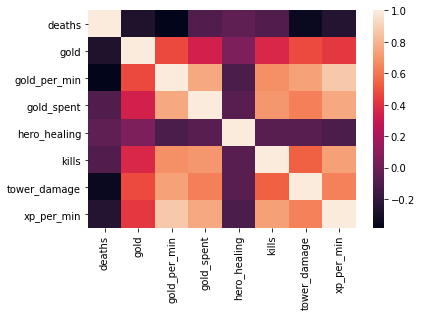

In [168]:
np.random.seed(123)
dataset.fillna(dataset.mean(), inplace=True) # fill 'NaNs', comment out if not needed
unique_features = ['deaths', 'gold', 'gold_per_min', 'gold_spent', 'hero_healing', 'kills', 'tower_damage', 'xp_per_min']
aggregated_dataset = pd.DataFrame()
for feature in unique_features:
    for team in [0, 128]:
        summed_feature = 0
        for i in range(5):
            summed_feature += dataset[f"{team + i}_{feature}"]
        if team == 0:
            aggregated_dataset[f"{feature}"] = summed_feature
        else:
            aggregated_dataset[f"{feature}"] -= summed_feature

aggregated_dataset["rad_won"] = dataset["rad_won"]
dataset = aggregated_dataset
X, y = dataset.iloc[:,:-1],dataset.iloc[:,-1]
# X = preprocessing.StandardScaler().fit_transform(X)
corr = dataset.iloc[:, :8].corr()
ax = sns.heatmap(
    corr,
)
dataset.info()

## XGBOOST


### Simple

              precision    recall  f1-score   support

       False       0.48      0.46      0.47      1189
        True       0.51      0.53      0.52      1259

    accuracy                           0.50      2448
   macro avg       0.50      0.50      0.49      2448
weighted avg       0.50      0.50      0.50      2448



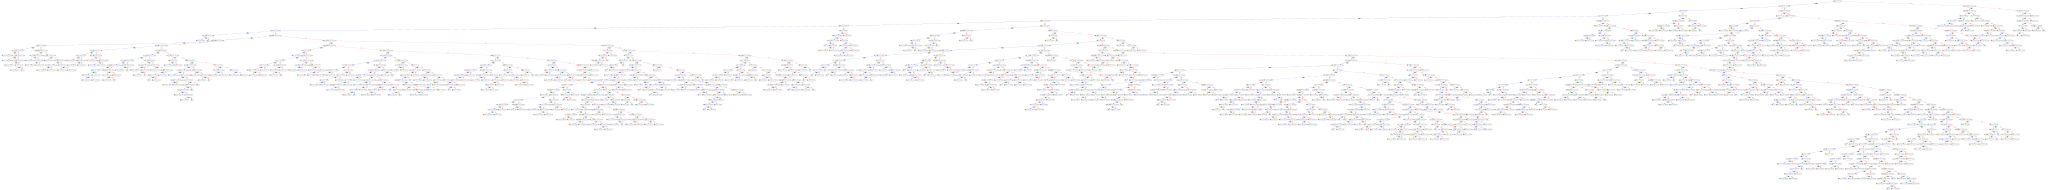

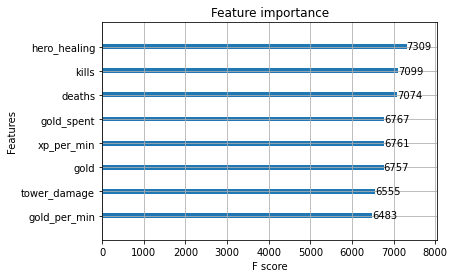

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model = xgb.XGBClassifier(
    learning_rate=0.2,
    n_estimators=750,
    max_depth=75,
    gamma=0,
    # subsample = 0.8,
    # colsample_bytree = 0.8,
    nthread=6,
    n_jobs=-1,
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res = classification_report(y_test, y_pred)
print(res)
# xgc.save_model("model001.model")
xgb.plot_importance(model)
xgb.to_graphviz(model, num_trees=0)

### Cross validation

In [170]:
# model = xgb.XGBClassifier(
#     gamma=0,
#     subsample = 0.8,
#     colsample_bytree = 0.8,
#     learning_rate=0.2,
#     n_estimators=1000,
#     max_depth=2,
#     nthread=6,
# )
# scores = cross_validate(model, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1"])
# print(scores)

### Tuning

In [171]:
# model = xgb.XGBClassifier(
#     gamma=0,
#     subsample = 0.8,
#     colsample_bytree = 0.8,
#     # nthread=6,
#     n_jobs=-1
# )
#
# param_grid = dict(
#     learning_rate=[0.05, 0.15, 0.2, 0.3],
#     n_estimators=[100, 300, 700, 1000, 1500],
#     max_depth=[2, 3, 5, 7, 9, 15, 50],
#     min_child_weight=[1, 3, 5]
# )
#
# kfold = StratifiedKFold(n_splits=5, shuffle=True)
# grid_search = GridSearchCV(model, param_grid, scoring=["accuracy", "precision", "recall", "f1"], refit="accuracy", n_jobs=-1, cv=kfold, verbose=10)
# results = grid_search.fit(X, y)
# print(results.best_score_, results.best_params_)
# joblib.dump(results, "tune_results.joblib")
#

In [172]:
# loaded_results = joblib.load("tune_results.joblib")